# BEE 4750 Homework 2: Dissolved Oxygen

**Name**: Christine Swanson

**ID**: cms549

> **Due Date**
>
> Friday, 09/22/23, 9:00pm

## Overview

### Instructions

This assignment asks you to use a simulation model for dissolved oxygen
to assess the impacts of two wastewater streams, including minimum
treatment levels and the impact of uncertain environmental conditions.
You will also be asked to identify a minimum distance for the addition
of a third discharge stream.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [15]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `c:\Users\chris\Box\classwork\2023_Fall\BEE5750\hw\hw02-christinemswanson`

In [16]:
using Plots
using LaTeXStrings
using Distributions
using Statistics

## Problems (Total: 40 Points)

A river which flows at 6 km/d is receiving waste discharges from two
sources which are 15 km apart, as shown in
<a href="#fig-river" class="quarto-xref">Figure 1</a>. The oxygen
reaeration rate is 0.55 day<sup>-1</sup>, and the decay rates of CBOD
and NBOD are are 0.35 and 0.25 day<sup>-1</sup>, respectively. The
river’s saturated dissolved oxygen concentration is 10m g/L.

![Figure 1: Schematic of the
system](attachment:figures/river_diagram.png)

### Problem 1 (8 points)

If the characteristics of the river inflow and waste discharges are
given in <a href="#tbl-river" class="quarto-xref">Table 1</a>, write a
Julia model to compute the dissolved oxygen concentration from the first
wastewater discharge to an arbitrary distance `d` km downstream. Use
your model to compute the maximum dissolved oxygen concentration up to
50km downstream and how far downriver this maximum occurs.

|    Parameter     |            River Inflow |         Waste Stream 1 |         Waste Stream 2 |
|:----------------:|------------------------:|-----------------------:|-----------------------:|
|      Inflow      | 100,000 m<sup>3</sup>/d | 10,000 m<sup>3</sup>/d | 15,000 m<sup>3</sup>/d |
| DO Concentration |                7.5 mg/L |                 5 mg/L |                 5 mg/L |
|       CBOD       |                  5 mg/L |                50 mg/L |                45 mg/L |
|       NBOD       |                  5 mg/L |                35 mg/L |                35 mg/L |

Table 1: River inflow and waste stream characteristics for Problem 1.

In [100]:
# DO model (this only works for single discharge point, not 2)

function dissolved_oxygen(x, Cs, C0, B0, N0, ka, kc, kn, U)
    a1 = exp(-ka * x / U)
    a2 = (kc / (ka - kc)) * (exp(-kc * x / U) - a1)
    a3 = (kn / (ka - kn)) * (exp(-kn * x / U) - a1)
    C = (Cs * (1 - a1)) + (C0 * a1) - (B0 * a2) - (N0 * a3)

    B0 = B0 * a1 # return B0
    N0 = N0 * a1 # return N0

    print("B0 is", B0, "N0 is", N0)
    return C
end

dissolved_oxygen (generic function with 1 method)

In [101]:
x = 0:0.1:15 # set the distance 
C_1 = (y -> dissolved_oxygen(y, 10, 7.27, 9.09, 7.73, 0.55, 0.35, 0.25, 6)).(x) # I calculated C0, N0, and B0 by hand

B0 is9.09N0 is7.73B0 is9.007055741983569N0 is7.6594654439530245B0 is8.924868332145124N0 is7.589574500273026B0 is8.843430864410896N0 is7.5203212961382B0 is8.76273649572353N0 is7.451700012314949B0 is8.682778445467061N0 is7.383704882668909B0 is8.603549994897168N0 is7.316330193680431B0 is8.525044486576594N0 is7.249570283964475B0 is8.44725532381574N0 is7.183419543794904B0 is8.370175970118353N0 is7.1178724146331B0 is8.293799948632277N0 is7.052923388660892B0 is8.218120841605213N0 is6.9885670083177445B0 is8.143132289845441N0 is6.924797865842163B0 is8.06882799218748N0 is6.861610602817296B0 is7.995201704962595N0 is6.798999909720667B0 is7.922247241474165N0 is6.736960525478031B0 is7.849958471477818N0 is6.675487237021291B0 is7.778329320666319N0 is6.614574878850456B0 is7.7073537701591555N0 is6.55421833259959B0 is7.637025855996779N0 is6.494412526606722B0 is7.567339668639468N0 is6.435152435487689B0 is7.498289352470755N0 is6.376433079713855B0 is7.429869105305387N0 is6.31824952519369B0 is7.3620731779017

3.7703766671855745N0 is3.2062719072986243B0 is3.7359728063382507N0 is3.1770153787672917B0 is3.7018828731818925N0 is3.148025809647528B0 is3.6681040031951158N0 is3.1193007639932064B0 is3.6346333579946624N0 is3.0908378280856703B0 is3.6014681250969023N0 is3.0626346102309197B0 is3.568605517681502N0 is3.034688740558637B0 is3.5360427743572513N0 is3.0069978708230534B0 is3.5037771589300317N0 is2.9795596742056265B0 is3.4718059601728952N0 is2.952371845119525B0 is3.440126491598246N0 is2.9254320990158904B0 is3.4087360912320976N0 is2.898738172191872B0 is3.3776321213903944N0 is2.8722878216004126B0 is3.34681196845737N0 is2.846078824661768B0 is3.3162730426659284N0 is2.8201089790767466B0 is3.2860127778800297N0 is2.7943761026416536B0 is3.256028631379065N0 is2.768878033064926B0 is3.2263180836441925N0 is2.7436126277854354B0 is3.1968786381466274N0 is2.7185777637924566B0 is3.167707821137865N0 is2.6937713374472714B0 is3.138803181441812N0 is2.6691912643064035B0 is3.1101622902488186N0 is2.644835478946465B0 is3.

151-element Vector{Float64}:
 7.27
 7.210287468684139
 7.151558941408789
 7.093803105773068
 7.037008765254879
 6.981164838083742
 6.92626035612431
 6.872284463770458
 6.81922641684984
 6.767075581538838
 ⋮
 4.82507303239822
 4.831600254132351
 4.838275237864572
 4.84509555153357
 4.8520587910659625
 4.859162580089342
 4.866404569648054
 4.873782437921795
 4.881293889946921

In [103]:
# from waste point 2 to end
#x_2 = 15:0.1:50
x_2 = 0:0.1:35 # need to reset the distance at the next box, not sure if needs to end at 50?
C_2 = (y -> dissolved_oxygen(y, 10, 4.89, 7.42, 5.916, 0.55, 0.35, 0.25, 6)).(x_2)

B0 is7.42N0 is5.916B0 is7.352294126019591N0 is5.862017796432871B0 is7.28520605330218N0 is5.808528168643625B0 is7.218730144546629N0 is5.755526621986234B0 is7.152860813890934N0 is5.7030087028273275B0 is7.08759252644286N0 is5.650969998171963B0 is7.02291979781485N0 is5.599406135292811B0 is6.958837193663182N0 is5.548312781362721B0 is6.89533932923133N0 is5.497685643090641B0 is6.83242086889749N0 is5.447520466360856B0 is6.770076525726237N0 is5.3978130358755285B0 is6.708301061024277N0 is5.348559174800489B0 is6.64708928390024N0 is5.299754744414261B0 is6.586436050828504N0 is5.251395643760301B0 is6.526336265216992N0 is5.203477809302389B0 is6.466784876978911N0 is5.155997214583186B0 is6.407776882108406N0 is5.108949869885894B0 is6.349307322260075N0 is5.062331821899003B0 is6.291371284332335N0 is5.016139153384111B0 is6.233963900054577N0 is4.970367982846749B0 is6.177080345578092N0 is4.925014464210242B0 is6.120715841070737N0 is4.880074786492518B0 is6.064865650315288N0 is4.835545173485882B0 is6.0095250803

3.3423663935372896N0 is2.664884040992804B0 is3.311868032642789N0 is2.640567558101717B0 is3.2816479626080373N0 is2.6164729577882953B0 is3.2517036440899227N0 is2.5925982154226395B0 is3.2220325609162863N0 is2.568941324849158B0 is3.1926322198744836N0 is2.5455002982179846B0 is3.163500150501893N0 is2.5222731658179516B0 is3.134633904878324N0 is2.4992579759110733B0 is3.1060310574203167N0 is2.476452794568544B0 is3.0776892046773336N0 is2.4538557055082357B0 is3.049605965129793N0 is2.4314648099336735B0 is3.0217789789889595N0 is2.409278226374486B0 is2.994205907998653N0 is2.3872940905283064B0 is2.9668844352387675N0 is2.3655105551041173B0 is2.939812264930585N0 is2.3439257896670274B0 is2.9129871222438664N0 is2.3225379804844626B0 is2.886406753105699N0 is2.3013453303737625B0 is2.860068924011093N0 is2.280346058551163B0 is2.833971421835301N0 is2.2595384004821617B0 is2.808112053647853N0 is2.238920607733248B0 is2.782488646528291N0 is2.2184909478249826B0 is2.757099047383578N0 is2.198247704086422B0 is2.731941

0.7452719290101291B0 is0.9262100111474748N0 is0.7384714859768815B0 is0.9177585477655145N0 is0.7317330954960625B0 is0.9093842021348604N0 is0.7250561913517297B0 is0.9010862705729307N0 is0.7184402124945362B0 is0.8928640558180939N0 is0.7118846029945882B0 is0.8847168669710784N0 is0.7053888119947306B0 is0.8766440194369154N0 is0.6989522936642577B0 is0.8686448348674176N0 is0.6925745071530517B0 is0.8607186411041741N0 is0.6862549165461314B0 is0.8528647721220731N0 is0.6799929908186233B0 is0.8450825679733366N0 is0.6737882037911401B0 is0.8373713747320635N0 is0.6676400340855644B0 is0.8297305444392858N0 is0.661547965081242B0 is0.8221594350485173N0 is0.6555114848715672B0 is0.8146574103718057N0 is0.6495300862209707B0 is0.807223840026275N0 is0.6436032665222969B0 is0.799858099381153N0 is0.637730527754569B0 is0.7925595695052895N0 is0.6319113764411446B0 is0.7853276371151421N0 is0.6261453236082454B0 is0.7781616945232485N0 is0.620431884743873B0 is0.7710611395871607N0 is0.6147705797570948B0 is0.76402537565884

351-element Vector{Float64}:
 4.89
 4.869181448930111
 4.848904546480252
 4.829162473551167
 4.809948483479734
 4.791255901321517
 4.77307812314018
 4.755408615303703
 4.738240913787322
 4.72156862348315
 ⋮
 7.605170324810561
 7.615290334379297
 7.625376473898118
 7.6354287529335085
 7.645447182537754
 7.655431775226934
 7.665382544959157
 7.675299507113066
 7.685182678466554

So it looks like the maximum discharge value is 8.81 mg/L, and this occurs at 50 km downstream? This can't be right...

### Problem 2 (4 points)

Use your model to plot the dissolved oxygen concentration in the river
from the first waste stream to 50km downstream. What do you notice?

In [144]:
# append the 2 vectors together
C_combined = [C_1; C_2];

502-element Vector{Float64}:
 7.27
 7.210287468684139
 7.151558941408789
 7.093803105773068
 7.037008765254879
 6.981164838083742
 6.92626035612431
 6.872284463770458
 6.81922641684984
 6.767075581538838
 ⋮
 7.605170324810561
 7.615290334379297
 7.625376473898118
 7.6354287529335085
 7.645447182537754
 7.655431775226934
 7.665382544959157
 7.675299507113066
 7.685182678466554

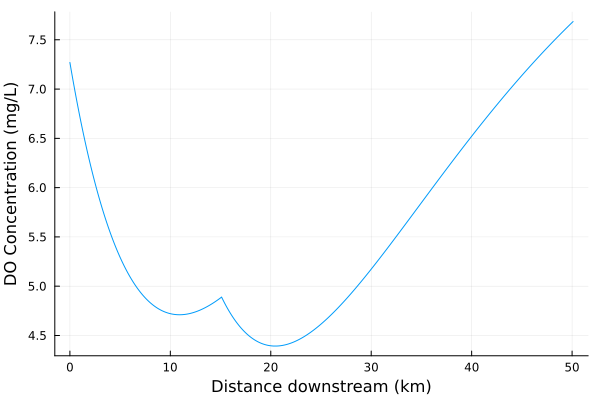

In [150]:
# plot [DO] versus distance downstream
# need to label this plot once I have it correct 
# need to fix x-axis

x_axis = collect(0:0.1:50.1) # create the x-axis for the plot
plot(x_axis, C_combined, xlabel = "Distance downstream (km)", ylabel = "DO Concentration (mg/L)", legend = false)

In [107]:
findmin(C_combined) # find minmum value in the array and the associated index position 

(4.392561977061808, 206)

So, the minimum DO value that occurs is 4.39 mg/L. This occurs at 20.6 km downstream.  

### Problem 3 (3 points)

Under the assumptions of Problem 1, determine the distance from waste
stream 2 it will take for the dissolved oxygen concentration of the
river to recover to 6 mg/L.

# find for all C greater than = 6

### Problem 4 (5 points)

What is the minimum level of treatment (% removal of organic waste) for
waste stream 2 that will ensure that the dissolved oxygen concentration
never drops below 4 mg/L, assuming that waste stream 1 remains
untreated?

### Problem 5 (5 points)

If both waste streams are treated equally, what is the minimum level of
treatment (% removal of organic waste) for the two sources required to
ensure that the dissolved oxygen concentration never drops below 4 mg/L?

### Problem 6 (5 points)

Suppose you are responsible for designing a waste treatment plan for
discharges into the river, with a regulatory mandate to keep the
dissolved oxygen concentration above 4 mg/L. Discuss whether you’d opt
to treat waste stream 2 alone or both waste streams equally. What other
information might you need to make a conclusion, if any?

### Problem 7 (5 points)

Suppose that it is known that the DO concentrations at the river inflow
can vary uniformly between 6 mg/L and 8 mg/L. How often will the
treatment plan identified in Problem 5 (both waste streams treated
equally) fail to comply with the regulatory standard?

### Problem 8 (5 points)

A factory is planning a third wastewater discharge into the river
downstream of the second plant. This discharge would consist of 5
m<sup>3</sup>/day of wastewater with a dissolved oxygen content of 4.5
mg/L and CBOD and NBOD levels of 50 and 45 mg/L, respectively.

Assume that the treatment plan you identified in Problem 5 is still in
place for the existing discharges. If the third discharge will not be
treated, under the original inflow conditions (7.5 mg/L DO), how far
downstream from the second discharge does this third discharge need to
be placed to keep the river concentration from dropping below 4 mg/L?

## References

List any external references consulted, including classmates.